In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
data=pd.read_csv('learningSet.txt')
data.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A


In [83]:
data_cat=data.select_dtypes(include=["object"])
data_cat

,OSOURCE,STATE,ZIP,MAILCODE,PVASTATE,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,...,RFA_21,RFA_22,RFA_23,RFA_24,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,GRI,IL,61081,,,0,,,,,...,S4E,S4E,S4E,S4E,L,E,X,X,X,C
1,BOA,CA,91326,,,0,,,,,...,N1E,N1E,,F1E,L,G,X,X,X,A
2,AMH,NC,27017,,,0,,,,,...,,S4D,S4D,S3D,L,E,X,X,X,C
3,BRY,CA,95953,,,0,,,,,...,A1D,A1D,,,L,E,X,X,X,C
4,,FL,33176,,,0,X,X,,,...,A3D,I4E,A3D,A3D,L,F,X,X,X,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,ASE,AK,99504,,,0,,,,,...,,,,,L,G,X,X,X,C
95408,DCD,TX,77379,,,0,,,,,...,,,,,L,F,X,X,X,A
95409,MBC,MI,48910,,,0,,X,,,...,P1D,P1D,,,L,E,X,X,X,B
95410,PRV,CA,91320,,,0,X,,,,...,A1F,A1F,S2F,S3F,L,F,X,X,X,A


In [84]:
for c in data_cat:
  data_cat[c]=data_cat[c].replace(' ',np.NaN)

<ipython-input-84-1c6996f5ecf0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cat[c]=data_cat[c].replace(' ',np.NaN)


In [85]:
# Check for null values in all the columns
nulls_percent=pd.DataFrame(data_cat.isna().sum()/len(data_cat)).reset_index()
nulls_percent.columns=['column_name','null_percentage']
nulls_percent

,column_name,null_percentage
0,OSOURCE,0.009726
1,STATE,0.000000
2,ZIP,0.000000
3,MAILCODE,0.985337
4,PVASTATE,0.984719
...,...,...
69,RFA_2A,0.000000
70,MDMAUD_R,0.000000
71,MDMAUD_F,0.000000
72,MDMAUD_A,0.000000


Exclude the following variables by looking at the definitions. Create a new empty list called drop_list. We will append this list and then drop all the columns in this list later:

OSOURCE - symbol definitions not provided, too many categories

ZIP CODE - we are including state already

In [86]:
drop_list=[]
drop_list

[]

In [87]:
#Identify columns that over 85% missing values
columns_above_threshold=nulls_percent[nulls_percent['null_percentage']>0.85]
print(len(columns_above_threshold))

30


In [88]:
columns_above_threshold

,column_name,null_percentage
3,MAILCODE,0.985337
4,PVASTATE,0.984719
6,RECINHSE,0.929747
7,RECP3,0.978860
8,RECPGVG,0.998805
9,RECSWEEP,0.983052
15,CHILD03,0.987989
16,CHILD07,0.983587
17,CHILD12,0.981019
18,CHILD18,0.970161


In [89]:
columns_above_threshold

,column_name,null_percentage
3,MAILCODE,0.985337
4,PVASTATE,0.984719
6,RECINHSE,0.929747
7,RECP3,0.978860
8,RECPGVG,0.998805
9,RECSWEEP,0.983052
15,CHILD03,0.987989
16,CHILD07,0.983587
17,CHILD12,0.981019
18,CHILD18,0.970161


In [ ]:
#Remove those columns from the dataframe
drop_columns_list=list(columns_above_threshold['column_name'])
drop_columns_list

In [ ]:
#Reduce the number of categories in the column GENDER. 
#The column should only have either "M" for males, "F" for females, and "other" for all the rest

In [91]:
data_cat['GENDER']=data_cat['GENDER'].apply(lambda x: 'other' if x in ['',' ' ,'U', 'C', 'J', 'A'] else x)
data_cat['GENDER'].value_counts()

<ipython-input-91-bcaa8a2407db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cat['GENDER']=data_cat['GENDER'].apply(lambda x: 'other' if x in ['',' ' ,'U', 'C', 'J', 'A'] else x)


F        51277
M        39094
other     2084
Name: GENDER, dtype: int64

Lab | Feature engineering

In this lab, you will use learningSet.csv file which you have already cloned in the previous activities.

Instructions
Here we will work on cleaning some of the other columns in the dataset using the techniques that we used before in the lessons.

- Check for null values in the numerical columns.
- Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.
- Use appropriate EDA technique where ever necessary

In [95]:
data_num=data.select_dtypes(include=["int64", "float64"])
data_num.head()

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,...,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,NaN,0,NaN,NaN,...,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,46.0,1.0,6.0,9.0,16,0.0,0.0,...,9310,9504.0,18.0,15.666667,148535,0,0.0,0,2,1.0
2,9001,1,0,NaN,NaN,3.0,1.0,2,0.0,0.0,...,9001,9101.0,12.0,7.481481,15078,0,0.0,1,4,60.0
3,8701,0,2801,70.0,NaN,1.0,4.0,2,0.0,0.0,...,8702,8711.0,9.0,6.812500,172556,0,0.0,1,4,41.0
4,8601,0,2001,78.0,1.0,3.0,2.0,60,1.0,0.0,...,7903,8005.0,14.0,6.864865,7112,0,0.0,1,2,26.0


In [96]:
data_num.shape

(95412, 407)

In [97]:
nulls_percent=pd.DataFrame(data_num.isna().sum()/len(data_num)).reset_index()
nulls_percent.columns=['column_name','null_percentage']
nulls_percent

,column_name,null_percentage
0,ODATEDW,0.000000
1,TCODE,0.000000
2,DOB,0.000000
3,AGE,0.248030
4,NUMCHLD,0.870184
...,...,...
402,TARGET_B,0.000000
403,TARGET_D,0.000000
404,HPHONE_D,0.000000
405,RFA_2F,0.000000


In [98]:
#we drop columns with 50% or more that contains nulls 
new_columns = nulls_percent[nulls_percent['null_percentage']>0.2]
new_columns.reset_index(drop=True)
     

,column_name,null_percentage
0,AGE,0.248030
1,NUMCHLD,0.870184
2,INCOME,0.223096
3,WEALTH1,0.468830
4,MBCRAFT,0.553955
...,...,...
71,RAMNT_20,0.917327
72,RAMNT_21,0.900296
73,RAMNT_22,0.781233
74,RAMNT_23,0.917631


In [99]:
drop_list_num = []    

In [100]:
drop_list_num = list(new_columns['column_name'])
drop_list_num

['AGE',
 'NUMCHLD',
 'INCOME',
 'WEALTH1',
 'MBCRAFT',
 'MBGARDEN',
 'MBBOOKS',
 'MBCOLECT',
 'MAGFAML',
 'MAGFEM',
 'MAGMALE',
 'PUBGARDN',
 'PUBCULIN',
 'PUBHLTH',
 'PUBDOITY',
 'PUBNEWFN',
 'PUBPHOTO',
 'PUBOPP',
 'WEALTH2',
 'ADATE_5',
 'ADATE_10',
 'ADATE_13',
 'ADATE_15',
 'ADATE_16',
 'ADATE_17',
 'ADATE_18',
 'ADATE_19',
 'ADATE_20',
 'ADATE_21',
 'ADATE_22',
 'ADATE_23',
 'ADATE_24',
 'RDATE_3',
 'RDATE_4',
 'RDATE_5',
 'RDATE_6',
 'RDATE_7',
 'RDATE_8',
 'RDATE_9',
 'RDATE_10',
 'RDATE_11',
 'RDATE_12',
 'RDATE_13',
 'RDATE_14',
 'RDATE_15',
 'RDATE_16',
 'RDATE_17',
 'RDATE_18',
 'RDATE_19',
 'RDATE_20',
 'RDATE_21',
 'RDATE_22',
 'RDATE_23',
 'RDATE_24',
 'RAMNT_3',
 'RAMNT_4',
 'RAMNT_5',
 'RAMNT_6',
 'RAMNT_7',
 'RAMNT_8',
 'RAMNT_9',
 'RAMNT_10',
 'RAMNT_11',
 'RAMNT_12',
 'RAMNT_13',
 'RAMNT_14',
 'RAMNT_15',
 'RAMNT_16',
 'RAMNT_17',
 'RAMNT_18',
 'RAMNT_19',
 'RAMNT_20',
 'RAMNT_21',
 'RAMNT_22',
 'RAMNT_23',
 'RAMNT_24']

In [101]:
drop_list_num.remove('INCOME')

In [102]:
data_num=data_num.drop(columns=drop_list_num)
data_num.head()

,ODATEDW,TCODE,DOB,INCOME,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,NaN,0,0,39,34,18,10,...,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,6.0,16,0,15,55,11,6,...,9310,9504.0,18.0,15.666667,148535,0,0.0,0,2,1.0
2,9001,1,0,3.0,2,0,20,29,33,6,...,9001,9101.0,12.0,7.481481,15078,0,0.0,1,4,60.0
3,8701,0,2801,1.0,2,0,23,14,31,3,...,8702,8711.0,9.0,6.812500,172556,0,0.0,1,4,41.0
4,8601,0,2001,3.0,60,1,28,9,53,26,...,7903,8005.0,14.0,6.864865,7112,0,0.0,1,2,26.0


In [103]:
data_num.shape

(95412, 332)

Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.

In [104]:
data_cat['GEOCODE2'].dtype

dtype('O')

In [105]:
data_num['ADI'].dtype

dtype('float64')

In [106]:
data_num['DMA'].dtype

dtype('float64')

In [108]:
data_num['MSA'].dtype

dtype('float64')

In [109]:
data_cat['GEOCODE2'] =data_cat['GEOCODE2'].replace(' ',np.nan)
import statistics
data_cat['GEOCODE2'] =data_cat['GEOCODE2'].fillna(statistics.mode(data_cat['GEOCODE2']))

<ipython-input-109-5a077344218c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cat['GEOCODE2'] =data_cat['GEOCODE2'].replace(' ',np.nan)
<ipython-input-109-5a077344218c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cat['GEOCODE2'] =data_cat['GEOCODE2'].fillna(statistics.mode(data_cat['GEOCODE2']))


In [110]:
print(data_cat['GEOCODE2'].value_counts(dropna=False))

A    34803
B    28505
D    16580
C    15524
Name: GEOCODE2, dtype: int64


Use appropriate EDA technique where ever necessary

In [111]:
data_num['INCOME'] = data_num['INCOME'].fillna(np.mean(data_num['INCOME']))

In [112]:
data_num['INCOME'].isnull().sum()

0

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GEOCODE2', ylabel='count'>

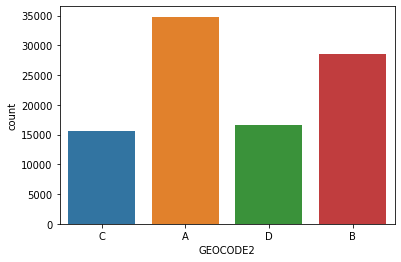

In [79]:
sns.countplot(data_cat['GEOCODE2'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GENDER', ylabel='count'>

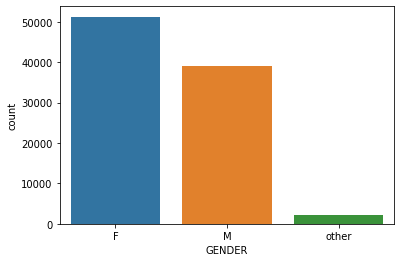

In [92]:
sns.countplot(data_cat['GENDER'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='INCOME', ylabel='count'>

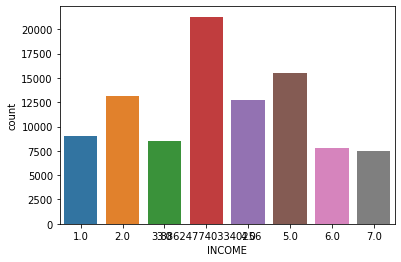

In [93]:
sns.countplot(data_num['INCOME'])

In [113]:
data_clean= pd.concat([data_num, data_cat],axis=1)
data_clean.head()

,ODATEDW,TCODE,DOB,INCOME,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,RFA_21,RFA_22,RFA_23,RFA_24,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,8901,0,3712,3.886248,0,0,39,34,18,10,...,S4E,S4E,S4E,S4E,L,E,X,X,X,C
1,9401,1,5202,6.000000,16,0,15,55,11,6,...,N1E,N1E,NaN,F1E,L,G,X,X,X,A
2,9001,1,0,3.000000,2,0,20,29,33,6,...,NaN,S4D,S4D,S3D,L,E,X,X,X,C
3,8701,0,2801,1.000000,2,0,23,14,31,3,...,A1D,A1D,NaN,NaN,L,E,X,X,X,C
4,8601,0,2001,3.000000,60,1,28,9,53,26,...,A3D,I4E,A3D,A3D,L,F,X,X,X,A
